In [1]:
import numpy as np

In [11]:
N = 500

phi_r1 = 2 * np.pi * np.random.rand(N)
R_r1 = (15 / (1 - 0.7*np.cos(phi_r1+np.pi/3))) * np.random.rand(N)
X0 = R_r1 * np.cos(phi_r1) + 0
Y0 = R_r1 * np.sin(phi_r1) + 0

XY0 = np.c_[X0, Y0]

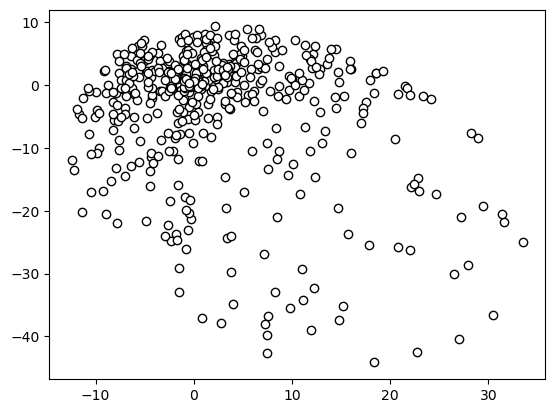

In [12]:
import matplotlib.pyplot as plt

plt.scatter(X0, Y0, c='w', edgecolors='k')
plt.show()

In [9]:
import mlgrad.af as af
import mlgrad.func as func
import mlgrad.utils as utils
import pandas as pd

import mlgrad.pca as pca

[ 2.37603673 -3.5563618 ]


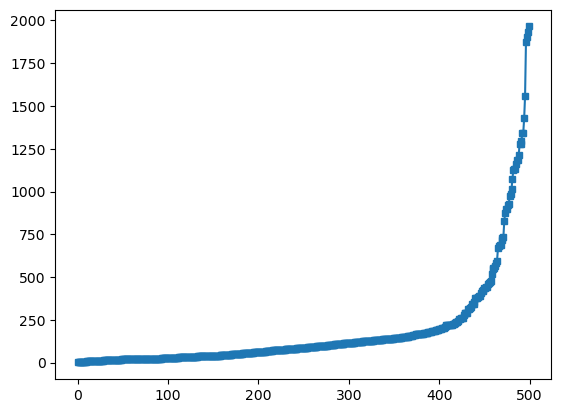

In [13]:
c0 = pca.find_center(XY0)
print(c0)
plt.plot(sorted(pca.distance_center(XY0, c0)), marker='s', markersize=4)
plt.show()

[ 1.91103542 -3.52830291]


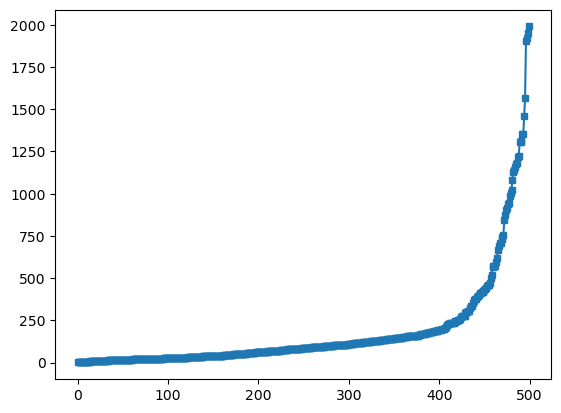

In [19]:
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=(N-25)/N)
c = pca.find_rob_center(XY0, wma)
print(c)
plt.plot(sorted(pca.distance_center(XY0, c)), marker='s', markersize=4)
plt.show()

In [20]:
XY1 = XY0 - c
XY1_0 = XY0 - c0

In [21]:
a1_0, L1_0 = pca.find_pc(XY1_0)
print(L1_0, a1_0)

120.58099911314034 [ 0.42622108 -0.90461903]


In [22]:
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=(N-25)/N)
a1, L1 = pca.find_rob_pc(XY1, wma)
print(L1, a1)

110.4970107374215 [-0.35344931  0.93545368]


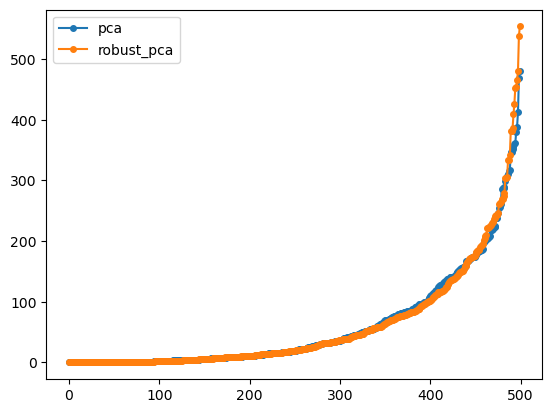

In [23]:
plt.plot(sorted(pca.distance_line(XY1_0, a1_0)), marker='o', markersize=4, label='pca')
plt.plot(sorted(pca.distance_line(XY1, a1)), marker='o', markersize=4, label='robust_pca')
plt.legend()
plt.show()